In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

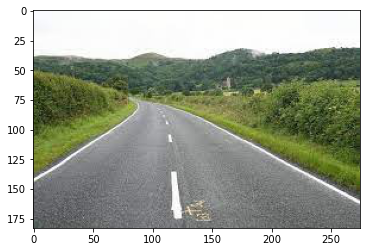

In [ ]:
image = mpimg.imread('image.jpg')
plt.imshow(image)
plt.show()

In [ ]:
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

In [ ]:
red_threshold =200
green_threshold = 200
blue_threshold = 200

In [ ]:
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [ ]:
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

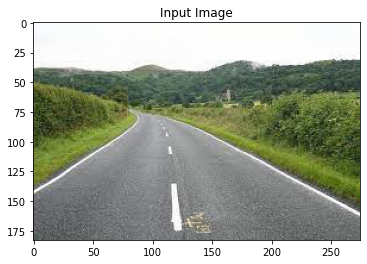

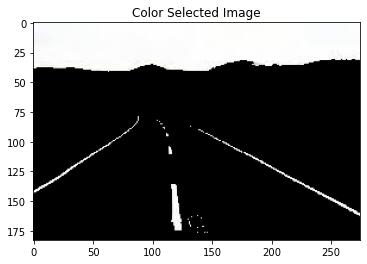

In [ ]:
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(color_select)
plt.title("Color Selected Image")
plt.show()

In [ ]:
left_bottom = [0,175]
right_bottom = [250, 150]
apex = [125,0]


In [ ]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [ ]:
# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [ ]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [ ]:
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [ ]:
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]

In [ ]:
line_image = np.copy(image)
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]


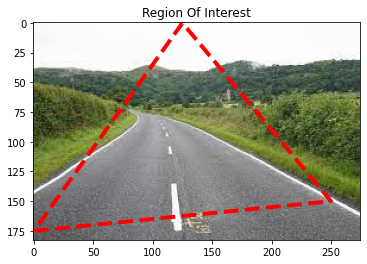

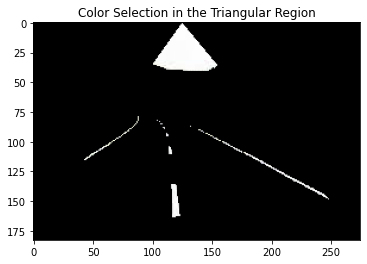

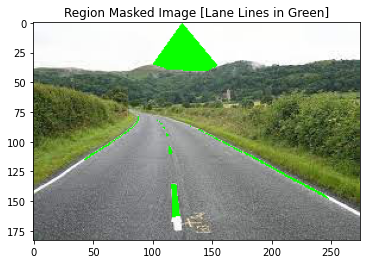

In [ ]:
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection in the Triangular Region")
plt.show()
plt.imshow(line_image)
plt.title("Region Masked Image [Lane Lines in Green]")
plt.show()